# ***EE chula model4***

# Implementation
- number of layer = 2
- number of hidden layer = 1
- layer 1 = 4 units, activation function is tanh
- loss = Mean Squared Error (MSE) = 0.064369
- stop training when epochs about 1000 epochs

# Feature
measurement data of solar cell on the rooftop of EE building (capacity of 8kW) collected during Jan 2017-Jun 2018 through CUBEMS portal. 

- datetime
- date
- time
- I is Solar irradiance (W/m2)
- T is Temperature (oC*10)
- UV is UV index (UV index*10)
- WS is Wind speed (m/s*10)
- RH is Relative humidity (%)
- P is Solar power (W*min)

# Result
- MSE = 0.064369

In [171]:
!ln -s ../data/ ./
!ln -s ../out/ ./

ln: failed to create symbolic link './data': File exists
ln: failed to create symbolic link './out': File exists


In [172]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from numpy import genfromtxt
import tensorflow as tf
import keras
from keras.layers import Activation, Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

# Load data for train

In [173]:
train = pd.read_csv('data/Train_data/dataset_rev4_train.csv')
#buffer datetime
buffer_datetime_train = train.datetime
#remove object
train = train.select_dtypes(exclude=['object'])
#replace misssing value
train.fillna(0,inplace=True)

# Load data for test

In [174]:
test = pd.read_csv('data/test_data/dataset_rev4_test.csv')
#buffer datetime
buffer_datetime_test = test.datetime
#remove object
test = test.select_dtypes(exclude=['object'])
#replace misssing value
test.fillna(0,inplace=True)

# Remove Outlier

In [175]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 13159
Number of rows without outliers: 118427


# Normalize

In [176]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('P')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)

mat_new = np.matrix(train.drop('P',axis = 1))
mat_y = np.array(train.P).reshape((118427,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

# Create training_set and prediction_set

In [177]:
# List of features
COLUMNS = col_train #column train (x train)
FEATURES = col_train_bis  #column train-label (x test)
LABEL = "P"

# Columns
feature_cols = FEATURES #(x test)

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS] #column train (x train)
prediction_set = train.P # column P

# Create x_train and Test 

In [178]:
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)

# Create training_set

In [179]:
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_sub = training_set[col_train]

# Create testing_set

In [180]:
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)

In [181]:
data_df = training_set

In [182]:
data_df.head(2)

,I,T,UV,WS,RH,P
108496,0.034862,0.452675,0.019608,0.279006,0.619369,0.016393
107582,0.196330,0.539095,0.176471,0.000000,0.677928,0.188525


In [183]:
data_df_ndarray = data_df.values

In [184]:
type(data_df_ndarray)

numpy.ndarray

In [185]:
data_df = pd.DataFrame(data_df_ndarray)

In [186]:
data_df.head(2)

,0,1,2,3,4,5
0,0.034862,0.452675,0.019608,0.279006,0.619369,0.016393
1,0.196330,0.539095,0.176471,0.000000,0.677928,0.188525


# Seperate feature and label

In [187]:
feature = data_df.loc[:,0:4]
label = data_df.loc[:,5:5]

X = feature.values
Y = label.values
X_new = X.transpose()
Y_new = Y.transpose()

In [188]:
print(X_new.shape)
print(Y_new.shape)

(5, 79346)
(1, 79346)


# Visualize the data:

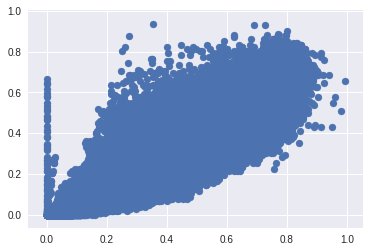

In [189]:
plt.scatter(X_new[0, :], X_new[2, :]);

# Create Dimension of variable

In [190]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X_new.shape
shape_Y = Y_new.shape
m = Y_new.size  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (5, 79346)
The shape of Y is: (1, 79346)
I have m = 79346 training examples!


# GRADED FUNCTION: layer_sizes

In [191]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

# Print Dimension

In [192]:
(n_x, n_h, n_y) = layer_sizes(X_new, Y_new)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


# GRADED FUNCTION: initialize_parameters

In [193]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [194]:
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02]
 [-8.41747366e-03  5.02881417e-03 -1.24528809e-02 -1.05795222e-02
  -9.09007615e-03]
 [ 5.51454045e-03  2.29220801e-02  4.15393930e-04 -1.11792545e-02
   5.39058321e-03]
 [-5.96159700e-03 -1.91304965e-04  1.17500122e-02 -7.47870949e-03
   9.02525097e-05]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.00878108 -0.00156434  0.0025657  -0.00988779]]
b2 = [[0.]]


# Dimension of parameter

In [195]:
print("W1 : (n_h, n_x) " + str(parameters["W1"].shape))
print("X : (n_x, m) " + str(X_new.shape))
print("b1 : (n_h, 1) " + str(parameters["b1"].shape))
print("W2 : (n_y, n_h) " + str(parameters["W2"].shape))
print("b2 : (n_y, 1)" + str(parameters["b2"].shape))

W1 : (n_h, n_x) (4, 5)
X : (n_x, m) (5, 79346)
b1 : (n_h, 1) (4, 1)
W2 : (n_y, n_h) (1, 4)
b2 : (n_y, 1)(1, 1)


# Define Relu function

In [196]:
def relu(Z):
    A = np.maximum(0,Z)   
    assert(A.shape == Z.shape)
    return A

# GRADED FUNCTION: forward_propagation

In [197]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    ### END CODE HERE ###
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [198]:
X_assess, parameters = X_new, parameters

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0028493365085705182 -0.0028490476624799623 0.0001995557475699708 0.00019955574429407242


# GRADED FUNCTION: compute_cost
change cost function

In [199]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example
    
    # Retrieve W1 and W2 from parameters
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
    
    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    #logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1-A2))
    ### END CODE HERE ###
    #cost = -1/m * np.sum(logprobs) 
    
    #cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    cost = sqrt(mean_squared_error(A2, Y))       
        
        
    assert(isinstance(cost, float))
    
    return cost

In [200]:
A2, Y_assess, parameters = A2,Y_new,parameters

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.3505309753351035


# GRADED FUNCTION: backward_propagation

In [201]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2= A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1 - np.power(A1, 2)))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [202]:
parameters, cache, X_assess, Y_assess = parameters,cache,X_new,Y_new

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 1.12767931e-03  1.30170913e-03  8.51595608e-04  3.43674568e-04
   1.52887176e-03]
 [ 2.00943667e-04  2.31950600e-04  1.51751117e-04  6.12331118e-05
   2.72432727e-04]
 [-3.29533018e-04 -3.80374516e-04 -2.48862617e-04 -1.00423867e-04
  -4.46769764e-04]
 [ 1.27039383e-03  1.46638112e-03  9.59404883e-04  3.87121414e-04
   1.72231530e-03]]
db1 = [[ 0.00234409]
 [ 0.00041769]
 [-0.00068497]
 [ 0.0026406 ]]
dW2 = [[ 5.17254806e-03  3.54131048e-03 -4.64898812e-03 -6.86904349e-05]]
db2 = [[-0.26705729]]


# GRADED FUNCTION: update_parameters

In [203]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [204]:
parameters, grads = parameters,grads
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00552079 -0.00212472 -0.02238388  0.0159903  -0.019769  ]
 [-0.00865861  0.00475047 -0.01263498 -0.010653   -0.009417  ]
 [ 0.00590998  0.02337853  0.00071403 -0.01105875  0.00592671]
 [-0.00748607 -0.00195096  0.01059873 -0.00794326 -0.00197653]]
b1 = [[-0.00281291]
 [-0.00050123]
 [ 0.00082197]
 [-0.00316872]]
W2 = [[-0.01498814 -0.00581391  0.00814449 -0.00980536]]
b2 = [[0.32046875]]


# GRADED FUNCTION: nn_model

In [205]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [206]:
X_assess, Y_assess = X_new,Y_new
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=2000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.350531
Cost after iteration 1000: 0.064369
W1 = [[-1.05038014  0.22429357 -0.24073736  0.0586456   0.22911081]
 [-0.6578439   0.05889285 -0.16347075 -0.00926632 -0.04216255]
 [ 0.60984732 -0.02522552  0.14256979 -0.01267842  0.03291563]
 [-0.36245535  0.020725   -0.06718232 -0.0079195  -0.01306803]]
b1 = [[ 0.37545959]
 [ 0.09373869]
 [-0.08441285]
 [ 0.02996647]]
W2 = [[-0.54671966 -0.3146287   0.29073578 -0.17230641]]
b2 = [[0.36379793]]
